# Example notebook for QDsim - simulating charge stability diagrams for a 4x4 shared control crossbar array quantum dot device

This notebook demonstrates how to use QDsim to simulate charge stability diagrams for a 4x4 shared control crossbar array quantum dot device. It is based on the example notebook for a double quantum dot system, but with a more complex device geometry and physical properties. The device consists of a 4x4 shared control crossbar array of quantum dots, with a total of 16 quantum dots. The device is described by a 4x4 grid of quantum dots, with shared control diagonal gates as in the paper https://arxiv.org/abs/2209.06609 .

Here is a brief overview of the steps covered in this notebook:
1. Import the necessary classes from QDsim.
2. Describe the device geometry and physical properties.
3. Simulation setup & plots: setting the non-scanned gate voltages in 3 different ways (do nothing, set all non-scanned gates to the same voltage value, set the voltages of all gates manually).
4. Get the charge configuration of a specific point in the 2D charge stability diagram.


If you are interested more in the saving and loading options available, please refer to the other example notebook titled example_saving_and_loading_data.ipynb .

## 1. Import
First, we import the necessary classes, specifically `QDDevice`, in which we can describe the device geometry and physical properties, and `QDSimulator`, in which we can describe the simulation setup.

In [1]:
from qdsim import QDDevice, QDSimulator

## 2. Device description

We create a 4x4 shared control crossbar array of quantum dots, with a total of 16 quantum dots by using the method `crossbar_array_shared_control`. We set the number of dots on each side to 4, and use the `equal_dots` and `equal_gates` parameters to modify the capacitance matrices.
 We then print the device properties and plot the device geometry. We also establish the sensor locations to be at the center of the device, and label it as 'S0'.

Device type: crossbar
Number of dots: 16
Number of gates: 7
Physical dot locations: [(0, 3), (0, 2), (1, 3), (0, 1), (1, 2), (2, 3), (0, 0), (1, 1), (2, 2), (3, 3), (1, 0), (2, 1), (3, 2), (2, 0), (3, 1), (3, 0)]
Dot-dot mutual capacitance matrix:
[[0.11 0.08 0.08 0.00 0.04 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00]
 [0.08 0.12 0.04 0.08 0.08 0.00 0.00 0.04 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00]
 [0.08 0.04 0.12 0.00 0.08 0.08 0.00 0.00 0.04 0.00 0.00 0.00 0.00 0.00
  0.00 0.00]
 [0.00 0.08 0.00 0.13 0.04 0.00 0.08 0.08 0.00 0.00 0.04 0.00 0.00 0.00
  0.00 0.00]
 [0.04 0.08 0.08 0.04 0.12 0.04 0.00 0.08 0.08 0.00 0.00 0.04 0.00 0.00
  0.00 0.00]
 [0.00 0.00 0.08 0.00 0.04 0.11 0.00 0.00 0.08 0.08 0.00 0.00 0.04 0.00
  0.00 0.00]
 [0.00 0.00 0.00 0.08 0.00 0.00 0.13 0.04 0.00 0.00 0.08 0.00 0.00 0.00
  0.00 0.00]
 [0.00 0.04 0.00 0.08 0.08 0.00 0.04 0.12 0.04 0.00 0.08 0.08 0.00 0.04
  0.00 0.00]
 [0.00 0.00 0.04 0.00 0.08 0.08 0.00 0.04 0.12 0.04 0.00 0.08 0.08 0.00


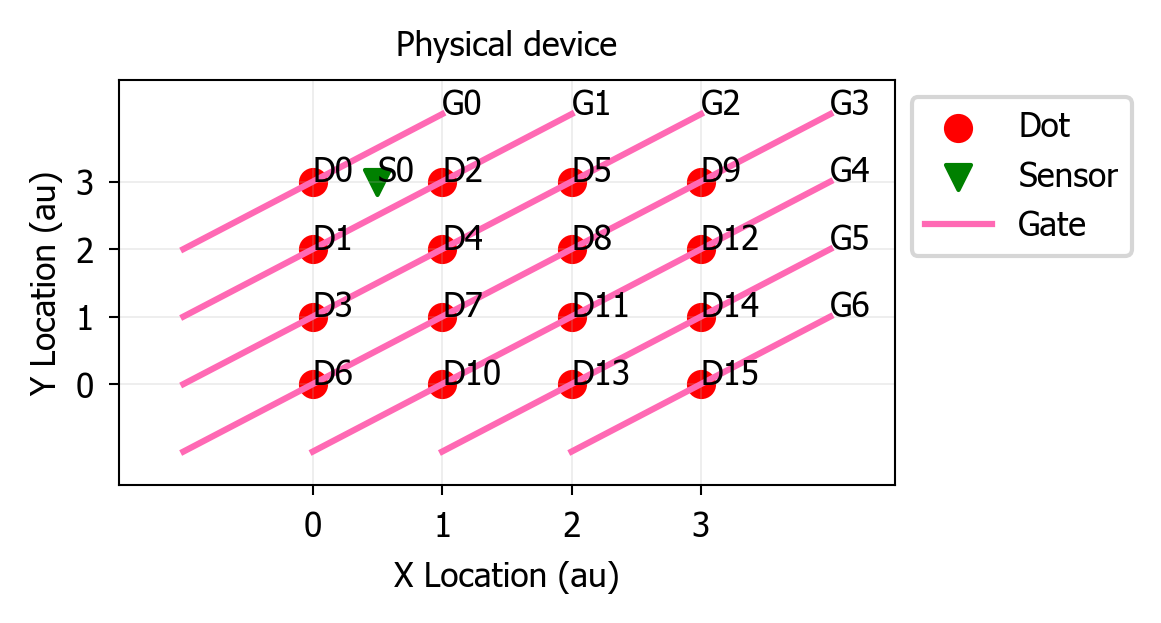

In [2]:
qddevice = QDDevice() # Create a QDDevice object
qddevice.crossbar_array_shared_control(n_dots_side=4, equal_dots=False, equal_gates=False)
qddevice.print_device_info() # Print the device properties

sensor_locations = [[0.5, 3]]
sensor_labels = ['S0']
qddevice.plot_device(sensor_labels=sensor_labels, sensor_locations=sensor_locations) # Plot the device geometry

## 3. Simulation setup & plots: setting the non-scanned gate voltages

In this section, we create a `QDSimulator` object and in order to add a little bit of variety, we decide to simulate Holes.
After setting the sensor locations using the `set_sensor_locations` method (same sensors as plotted before), we simulate the charge stability diagram using the `simulate_charge_stability_diagram` method. We set the voltage ranges for the x and y axes to be -5 to 20 V, and the number of points per axis to be 60. However, in this device we have 7 different gates (indexed from 0 to 6), of which two will be scanned. We have the option to manually set up the voltages applied to the other gates. This can be done in 3 ways:
1. by doing nothing, which will set all the non-scanned gates to 0.
2. by setting `fixed_voltage` to a float value, which will set all the non-scanned gates to the same voltage value.
3. by setting the `gates_voltages` parameter to a list of 7 values, where the gates to be scanned will be set to 'None' and the other gates will be set to the desired voltage values.


In the following cells we will see all three methods applied, plus the plotted charge stability diagrams resulting from our choices.

We specify the scanning gate indexes to be [0, 1], which correspond to the first two gates, G0 and G1, in the device geometry. We use the 'MOSEK' solver and set `use_ray` to True to achieve a faster simulation.

### 3.1. Method 1: Do nothing, aka set all non-scanned gates to 0


2024-03-27 11:18:29,978	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
100%|██████████| 1/1 [00:00<00:00, 21.57it/s]


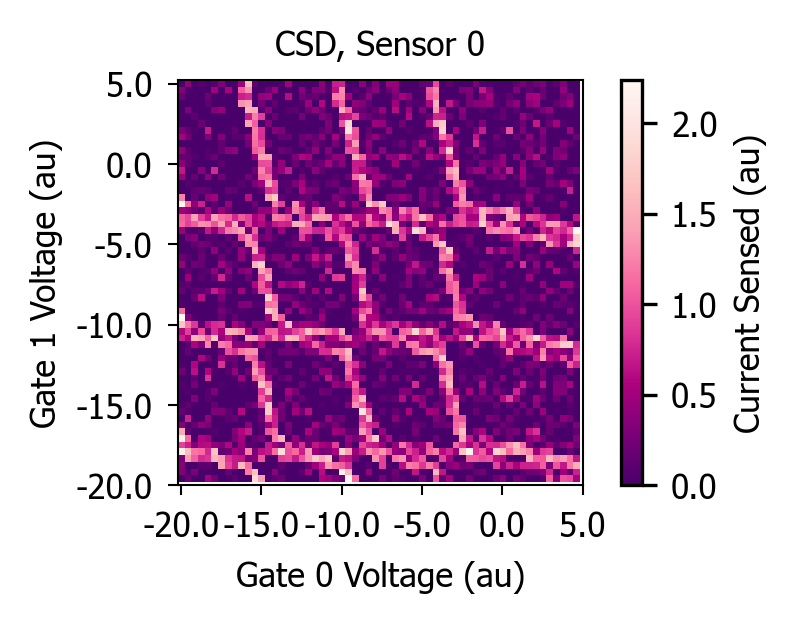

In [3]:
# Create a QDSimulator object
qdsimulator = QDSimulator('Holes')

# Set the sensor locations from which the charge stability diagram is measured
qdsimulator.set_sensor_locations(sensor_locations=sensor_locations)

# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(
    qd_device=qddevice, v_range_x=[-20, 5], solver='MOSEK',
    v_range_y=[-20, 5], n_points_per_axis=60,
    scanning_gate_indexes=[0, 1], use_ray=True)

# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, gaussian_noise=True)

### 3.2. Method 2: Set all non-scanned gates to the same voltage value using `fixed_voltage`

2024-03-26 20:38:09,965	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
100%|██████████| 1/1 [00:00<00:00, 21.24it/s]


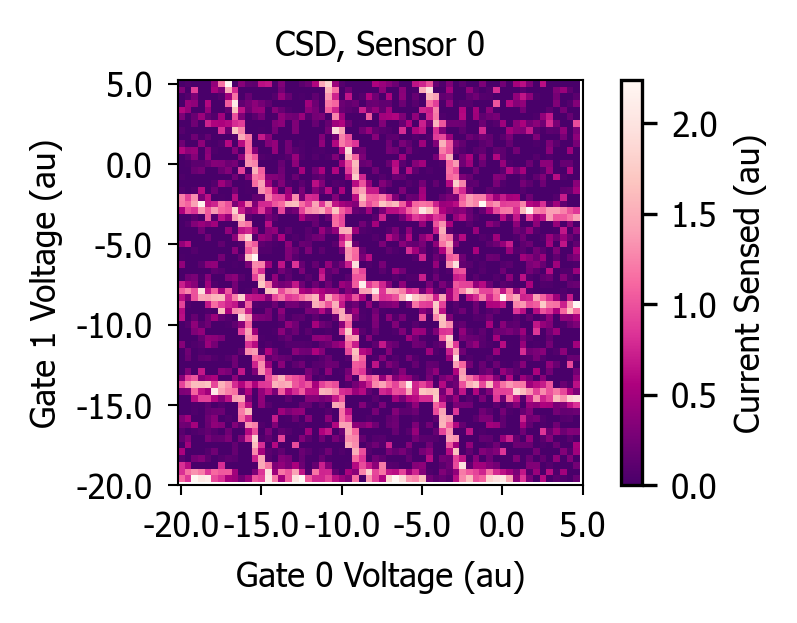

In [7]:
# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(
    qd_device=qddevice, v_range_x=[-20, 5], solver='MOSEK',
    v_range_y=[-20, 5], n_points_per_axis=60, fixed_voltage=-30,
    scanning_gate_indexes=[0, 1], use_ray=True)

# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, gaussian_noise=True)

### 3.3. Method 3: Set the voltages of all gates manually using `gates_voltages`

Here for further clarity we changed the `scanning_gate_indexes` to [3, 6], which correspond to the  gates G3 and G6 in the device geometry, in order to make explicit the difference between the scanned and non-scanned gates. We set the voltages of the non-scanned gates in the following way:
- G0: -3
- G1: -30
- G2: 15
- G4: 0
- G5: -15

with G3 and G6 being the scanned gates, therefore set to 'None'.

2024-03-26 20:43:50,500	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
100%|██████████| 1/1 [00:00<00:00, 21.23it/s]


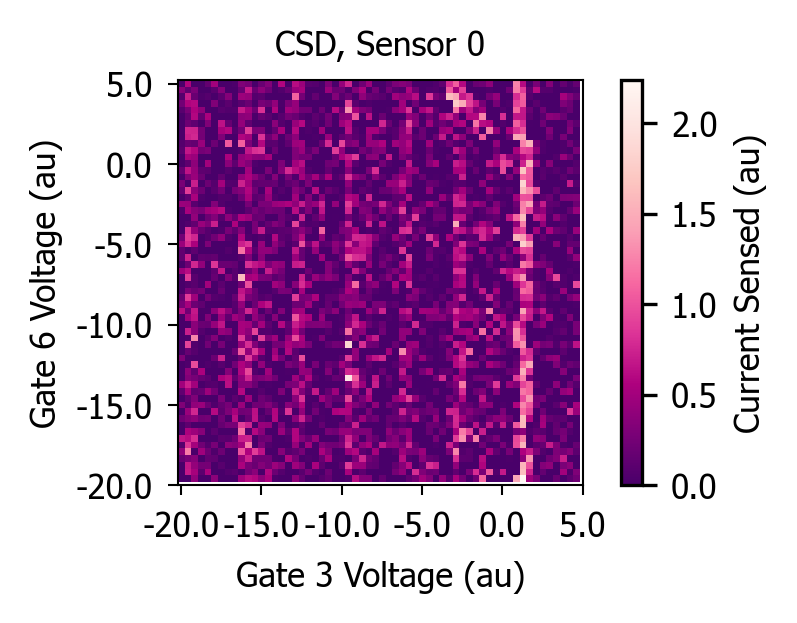

In [8]:
# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(
    qd_device=qddevice, v_range_x=[-20, 5], solver='MOSEK',
    v_range_y=[-20, 5], n_points_per_axis=60, gates_voltages=[ -3, -30, 15, None, 0, -15, None], scanning_gate_indexes=[3, 6], use_ray=True)

# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, gaussian_noise=True)

## 4. Get the charge configuration of a specific point in the charge stability diagram

To get the charge configuration of a specific point in the charge stability diagram, we can use the `get_charge_configuration` method. We can specify the voltage point for which we want to get the charge configuration. The method will return the charge configuration at that point, which is a tuple containing the voltage point simulates (which will be the closest one to the `voltage_point` specified) and the charge configuration at that point.

Here we provide examples of how to get the charge configuration at the points [2.5, 2.5], [-5, 0], and [-5, -7].

The data originally used here is the one of section 3.1 (Method 1 - do nothing), but the same method can be applied to the data of sections 3.2 and 3.3.

Charge configuration at chosen point [2.5, 2.5] :
Voltage point considered: [2.88135593 2.88135593 0.         0.         0.         0.
 0.        ]
Charge configuration: [-0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Charge configuration at chosen point [2.5, 2.5] :
Voltage point considered: [-4.74576271  0.33898305  0.          0.          0.          0.
  0.        ]
Charge configuration: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Charge configuration at chosen point [-5, 0] :
Voltage point considered: [-4.74576271 -6.86440678  0.          0.          0.          0.
  0.        ]
Charge configuration: [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(array([-4.74576271, -6.86440678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]),
 array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

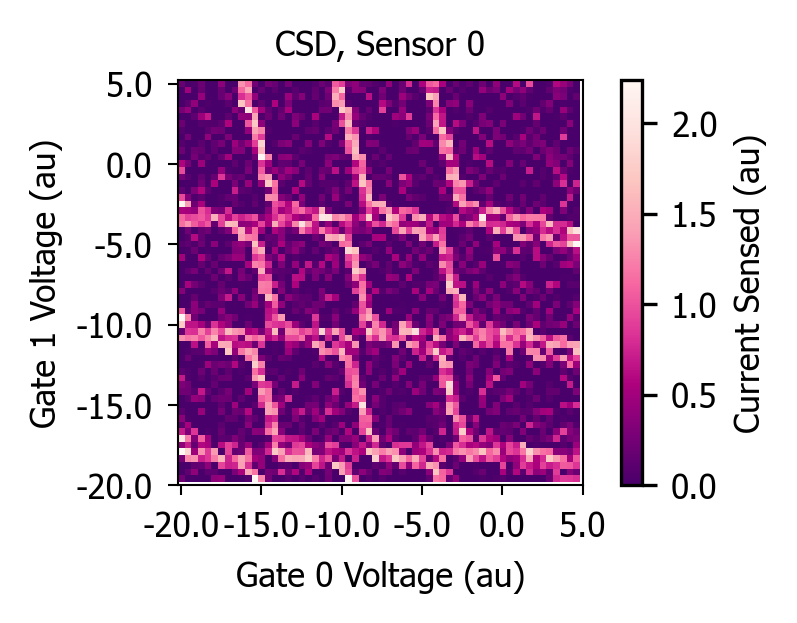

In [13]:
# plot the charge stability diagram for visual help
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, gaussian_noise=True)

# Let's try the empty region first
voltage_point = [2.5, 2.5]
# Get the charge configuration of a specific point in the charge stability diagram
# We can either save the voltage and charge configuration in a variable or just print it
# Here we save it in a variable
print('Charge configuration at chosen point', voltage_point, ':')
voltage_and_charge_configuration = qdsimulator.get_charge_configuration(voltage_point=voltage_point)
print('\n')

# Now let's try a region with charge
# Here we don't save the voltage and charge configuration in a variable, we just print it
print('Charge configuration at chosen point', voltage_point, ':')
voltage_point = [-5, 0]
qdsimulator.get_charge_configuration(voltage_point=voltage_point)
print('\n')

# Now let's try a different region with charge
print('Charge configuration at chosen point', voltage_point, ':')
voltage_point = [-5, -7]
qdsimulator.get_charge_configuration(voltage_point=voltage_point)